# Pymaceuticals Inc.
---

### Analysis
There is a positive and strong correlation between weight and tumor volume of the entire Capomulin regimen. The correlation coefficient is 0.841936, which is very close to +1. The drug Capomulin recorded the highest observed timepoints compared to the other drug regimens that were calculated in the bar plots. There was also a total of more mouse males (51%) in the study than there were mouse females.
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df= pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how= "left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_number= len(merge_df['Mouse ID'].unique())
unique_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
unique_drug_regimens = clean_df['Drug Regimen'].unique()
print(unique_drug_regimens)

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Zoniferol' 'Propriva' 'Placebo' 'Ceftamin']


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_number= len(clean_df['Mouse ID'].unique())
unique_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

summary_stats.rename(columns={
   'Mean Tumor Volume': 'mean',
   'Median Tumor Volume': 'median',
   'Variance Tumor Volume': 'var',
   'Standard Deviation Tumor Volume': 'std',
   'SEM Tumor Volume': 'sem'

})
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

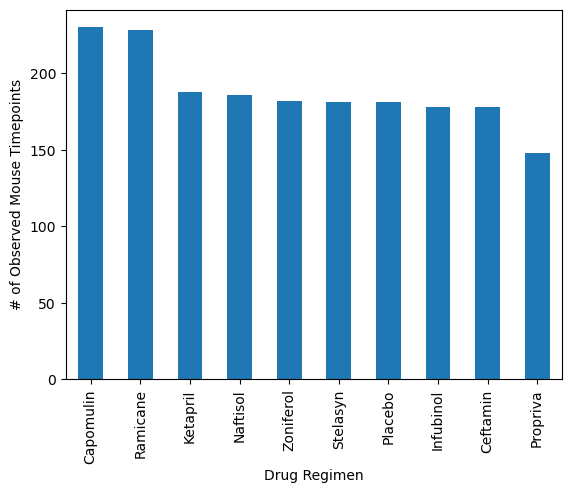

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts= clean_df['Drug Regimen'].value_counts()
counts.plot(kind= 'bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

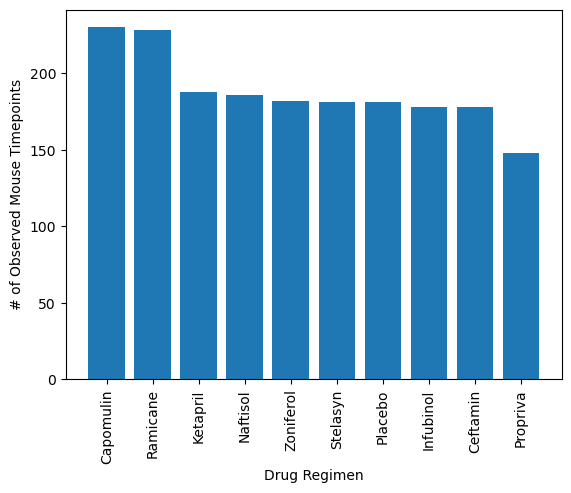

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
complete_data= {
    'Drug Regimen':['Capomulin','Ramicane','Ketapril','Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
    'Timepoint':[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

}
df= pd.DataFrame(complete_data)

plt.bar(df['Drug Regimen'],df['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.tight_layout
plt.show


<Axes: ylabel='Sex'>

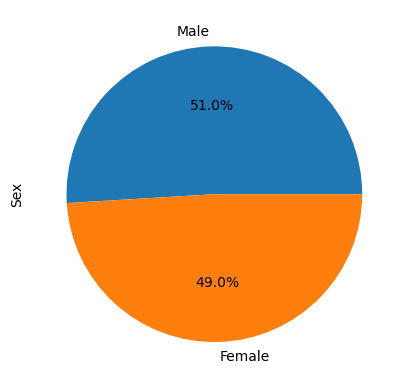

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvm = clean_df['Sex']
df_sex= pd.DataFrame({'Sex':fvm})
sex_counts= df_sex['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct= '%1.1f%%')

Text(0, 0.5, 'Sex')

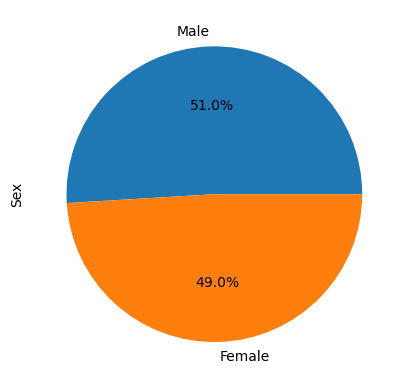

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fvm = clean_df['Sex']
df_sex= pd.DataFrame({'Sex':fvm})
sex_counts= df_sex['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct= '%1.1f%%')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatment4_df= clean_df[clean_df["Drug Regimen"].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_greatest= treatment4_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_volume= pd.merge(last_greatest, clean_df, on=['Mouse ID','Timepoint'], how='left')
filtered_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume= filtered_volume.loc[filtered_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=final_volume.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq=quartiles[0.75]
    iqr= upperq-lowerq
    lower_bound= lowerq-(1.5*iqr)
    upper_bound= upperq+(1.5*iqr)
    outliers= final_volume.loc[(final_volume<lower_bound)|(final_volume>upper_bound)]

    print(f"{drug}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


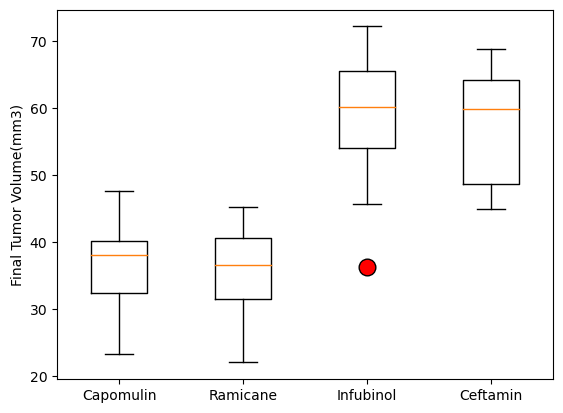

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out= dict(markerfacecolor='red',markersize='12')
plt.boxplot(tumor_list, labels=treatment_regimens,flierprops=orange_out)
plt.ylabel('Final Tumor Volume(mm3)')
plt.show()

## Line and Scatter Plots

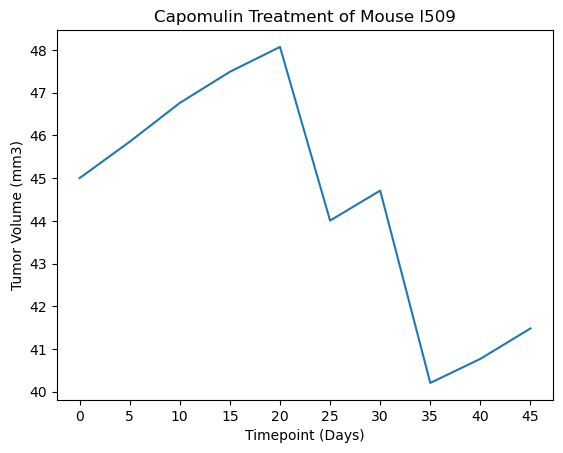

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data=clean_df[clean_df['Drug Regimen']=='Capomulin']
mouse_id='l509'
mouse_data=capomulin_data[capomulin_data['Mouse ID']==mouse_id]
mouse_data
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.xticks(mouse_data['Timepoint'])
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

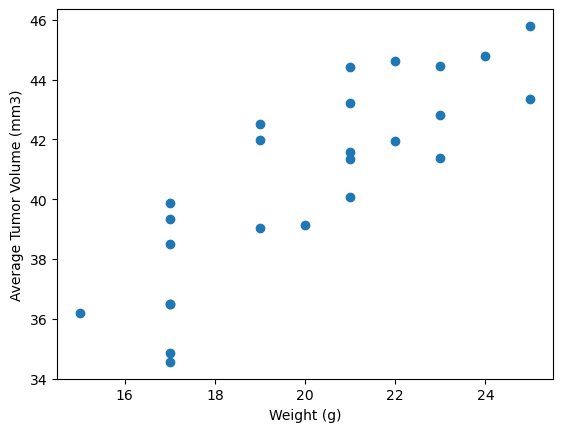

In [105]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=clean_df[clean_df['Drug Regimen']=='Capomulin']
avg_tv=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight=capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(avg_weight, avg_tv, marker="o")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

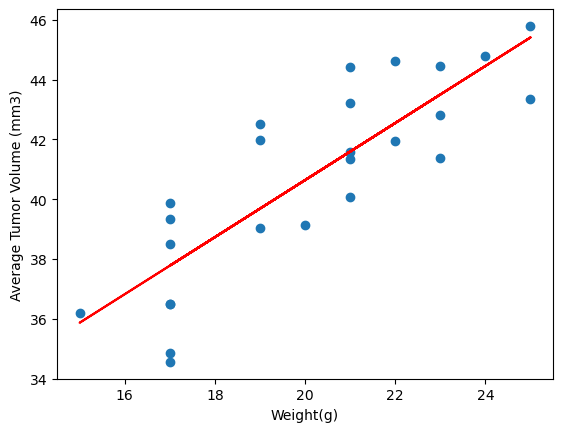

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, p_value= st.pearsonr(avg_weight, avg_tv) 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tv)
plt.scatter(avg_weight,avg_tv, marker='o')
plt.plot(avg_weight,slope*avg_weight+intercept, color='r')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

In [116]:
print (f'Correlation Coefficient:{correlation_coefficient:2f}')

Correlation Coefficient:0.841936
